# Importing Libraries

In [1]:
#importing the libraries
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# Loading the CSV file

In [2]:
#importing the file from github
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/Skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
#checking if there is any null values
df.isnull().values.any()

False

In [4]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
df.dtypes
#describes which column is of which data type

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [7]:
#checking unique value for every column
df.apply(lambda x: len(x.unique()))

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

# EDA

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [9]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

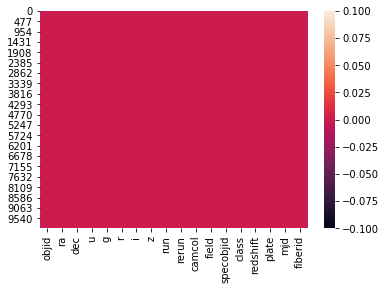

In [10]:
sns.heatmap(df.isnull())

# Univariate Analysis

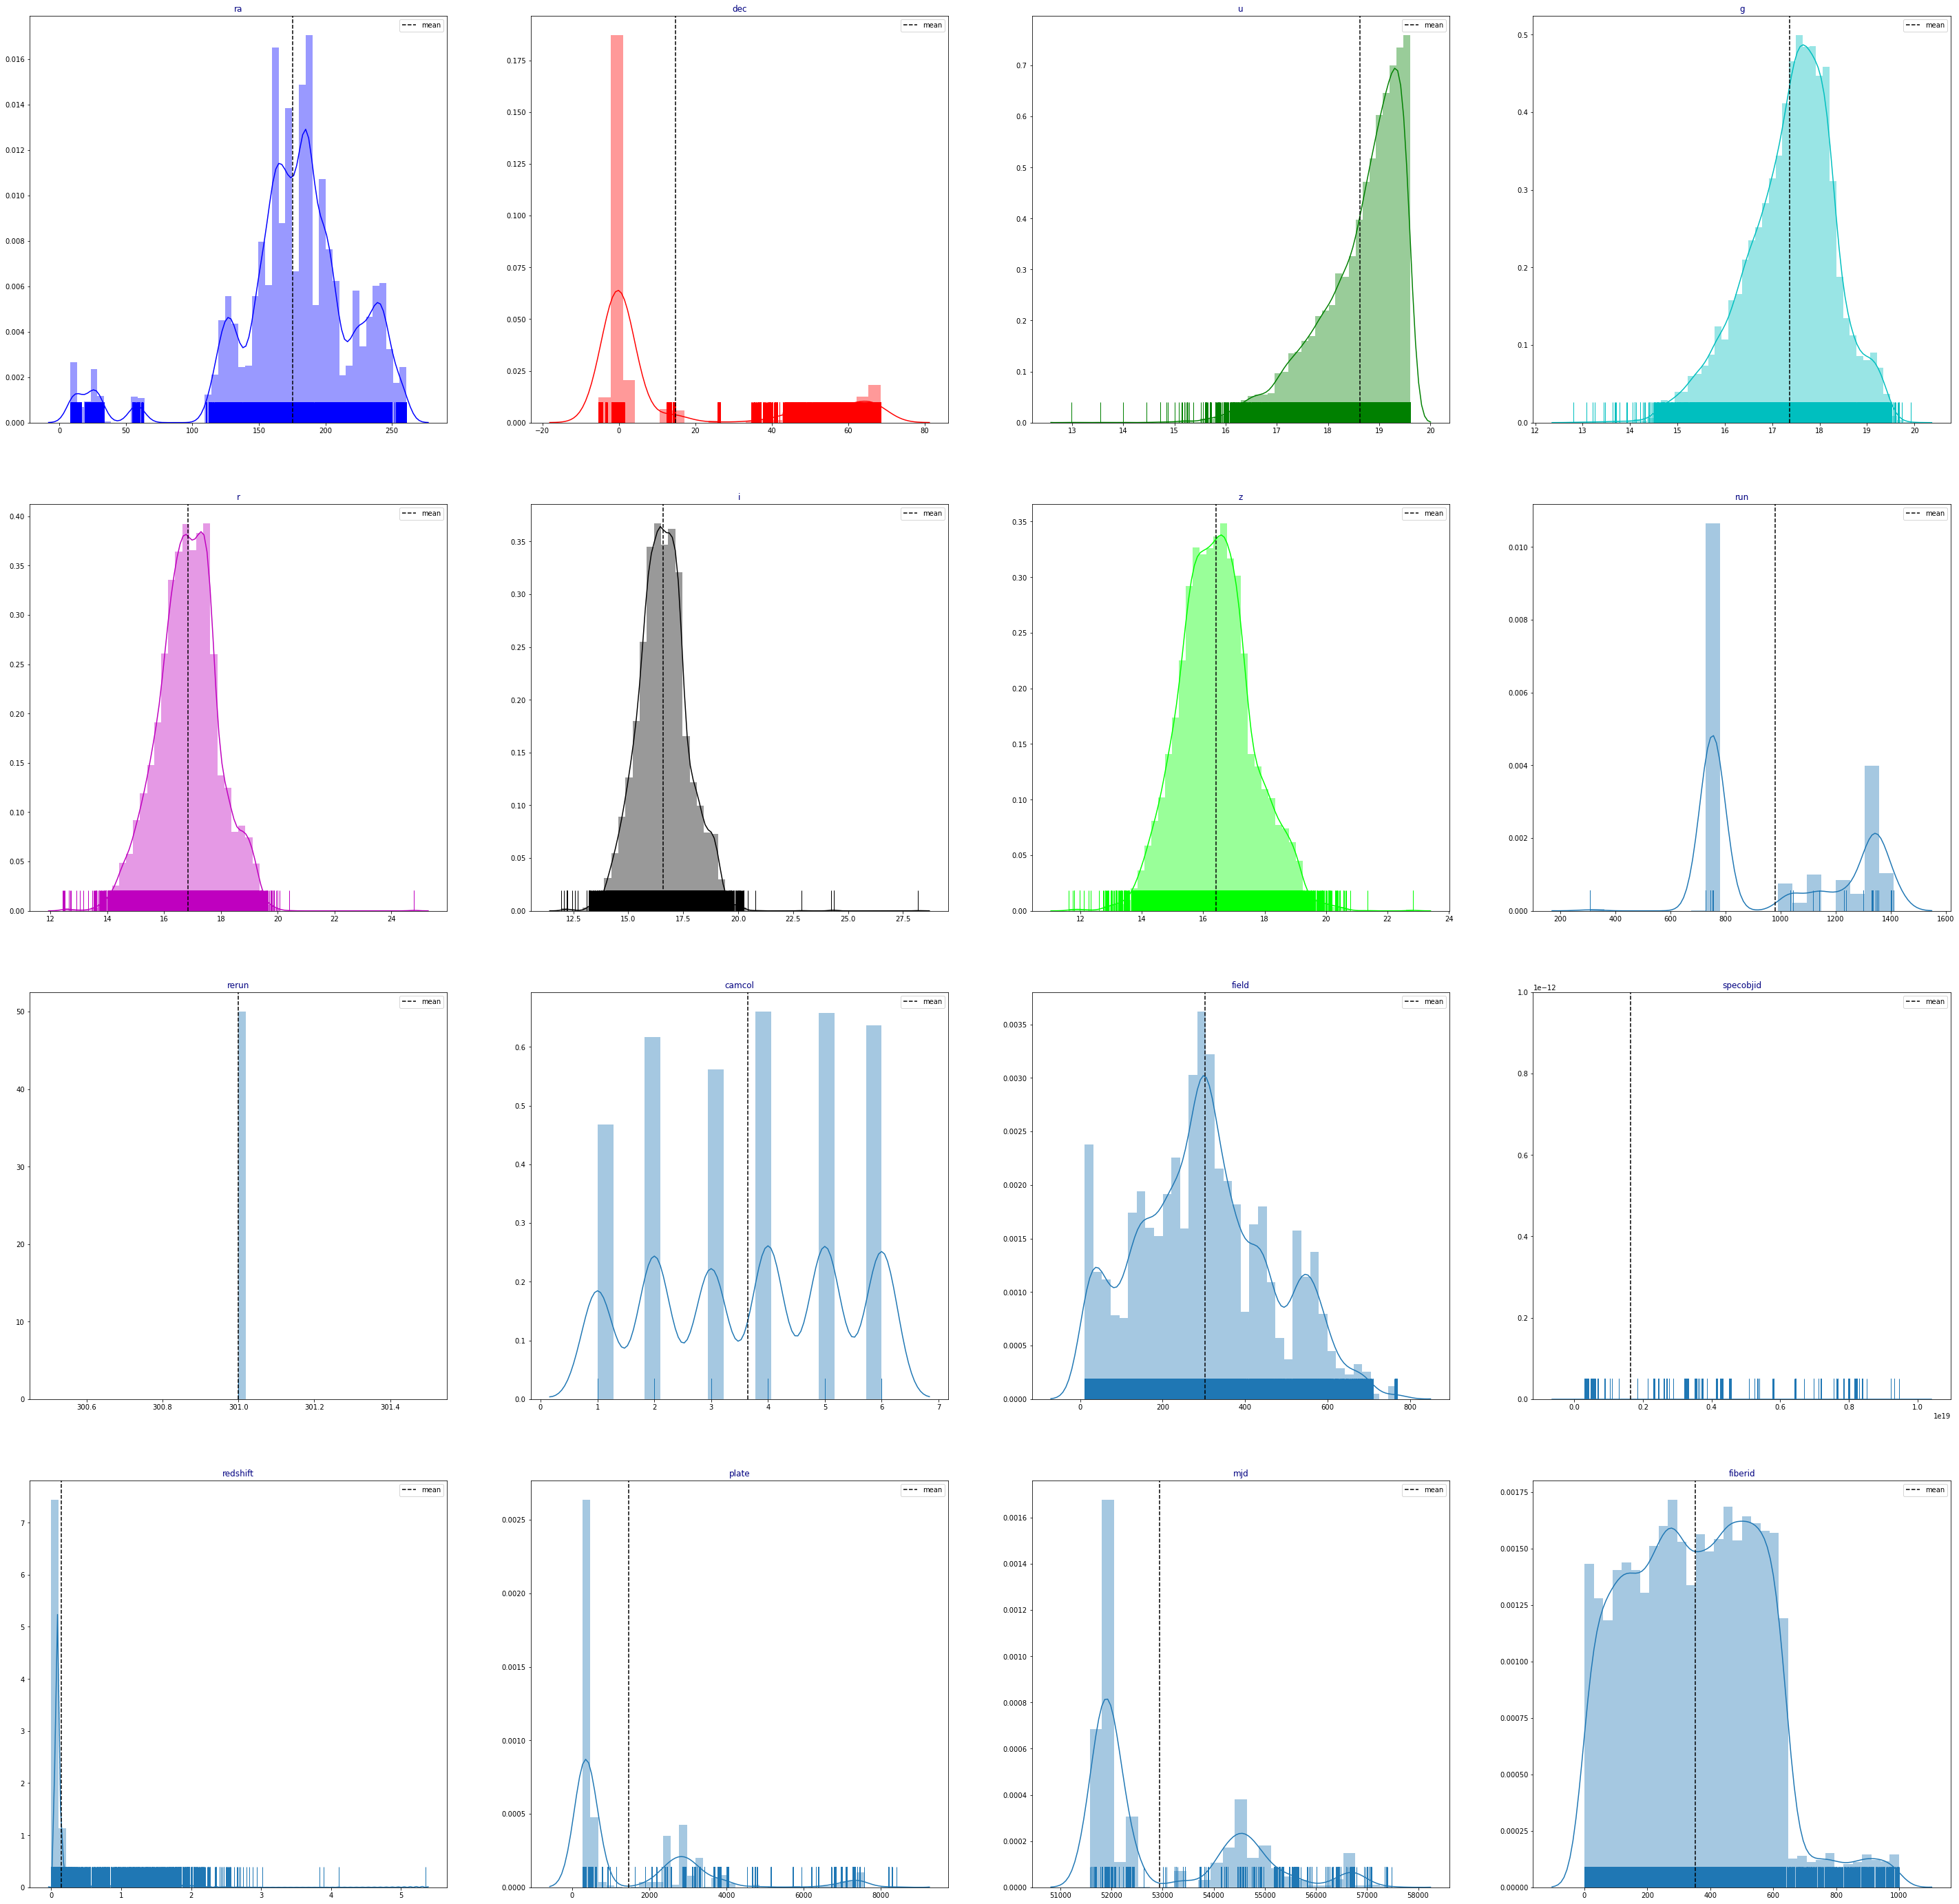

In [11]:
#code to observe the skewness in every column.
import itertools
cols=[ 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid',  'redshift', 'plate', 'mjd', 'fiberid']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(50,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,4,j+1)
    ax=sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Multivariate Analysis

In [12]:
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


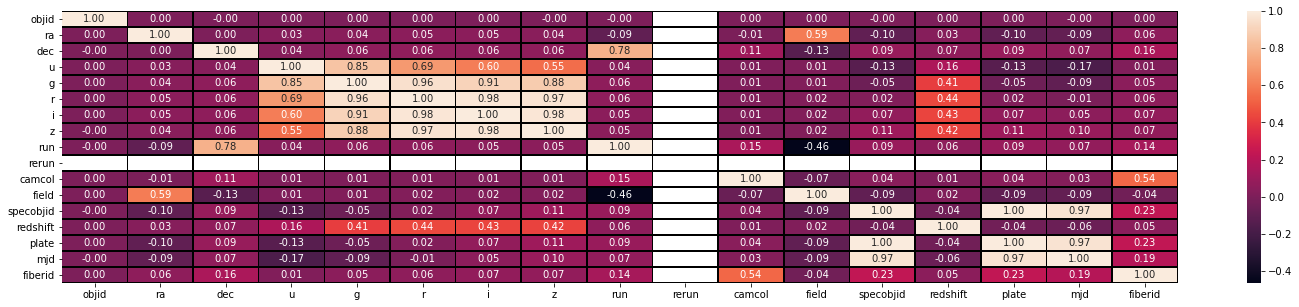

In [13]:
plt.figure(figsize=(25,5))

sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor="black",fmt='.2f')

In [14]:
#moving the categorical attributes
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['class']

In [15]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

class
GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64



In [16]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['class']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [17]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229


In [18]:
collist=df.columns.values
ncol=18
nrows=10

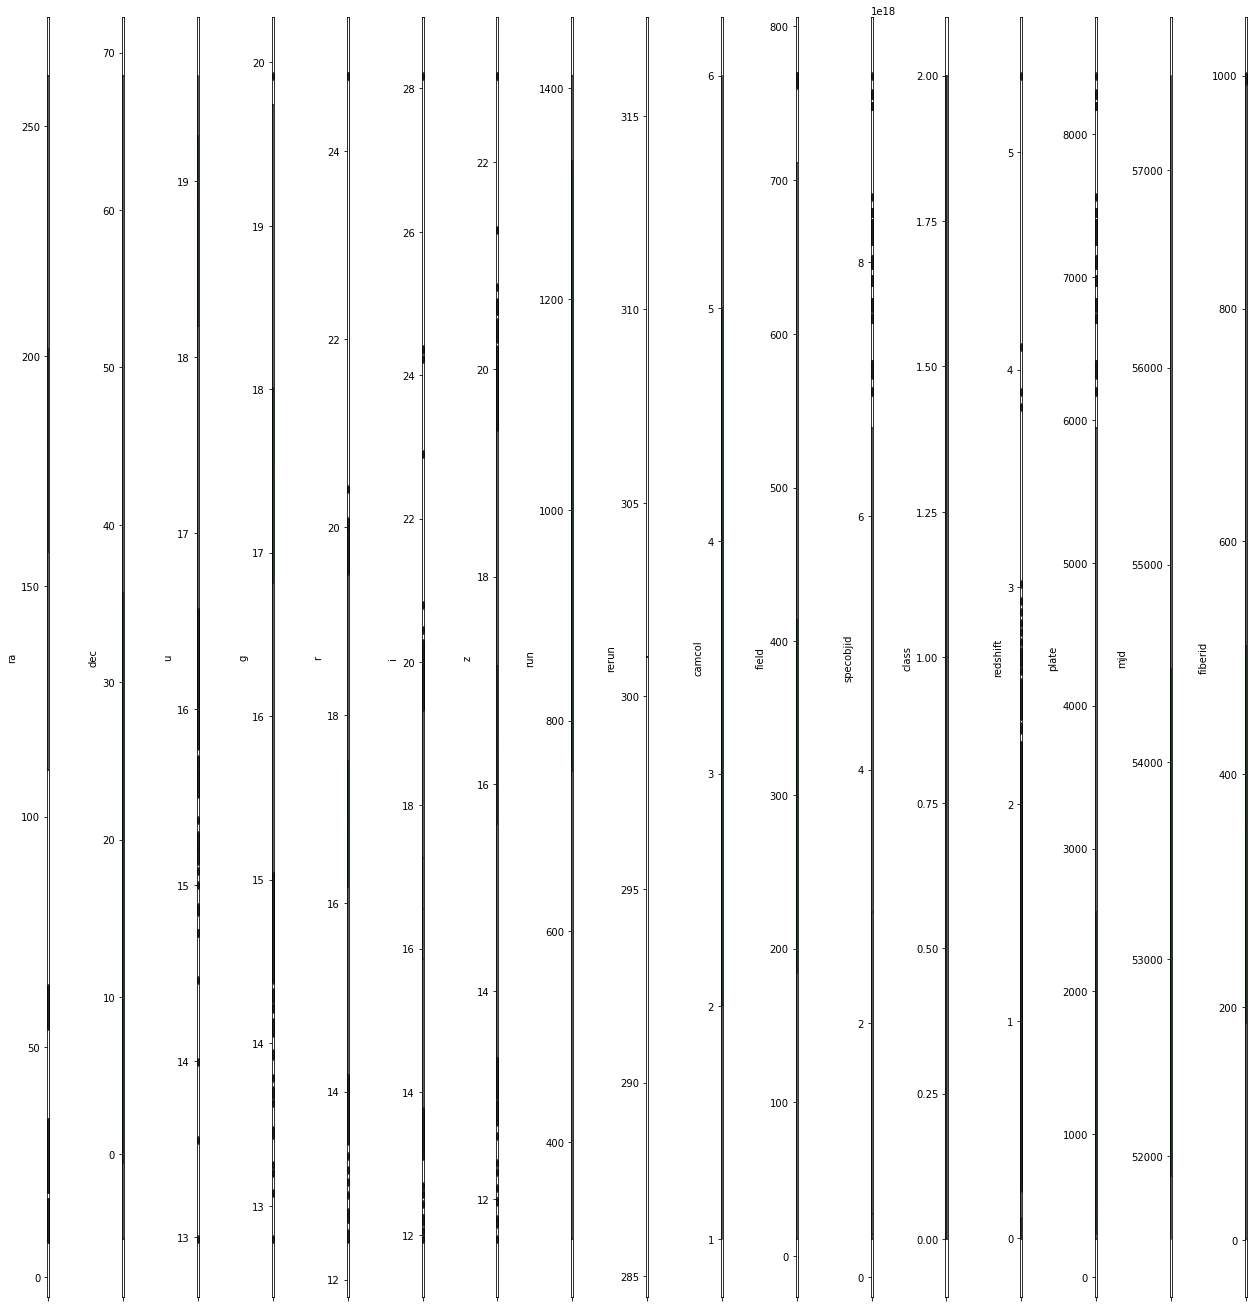

In [19]:
#code for checking the outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(ncol,10*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [20]:
#removing outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[       nan, 0.16745842, 0.58492272, ..., 1.03148936, 1.30931064,
        0.66863177],
       [       nan, 0.16886159, 0.58311429, ..., 0.63621258, 0.87919741,
        0.91101156],
       [       nan, 0.17057433, 0.58347525, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [       nan, 0.92039468, 1.46090664, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [       nan, 0.92197294, 1.46432109, ..., 0.56688806, 0.70581092,
        0.60143828],
       [       nan, 0.91804124, 1.46639319, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [21]:
#to remove outliers we need threshold +3 and -3
threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 9999, 9999, 9999], dtype=int64), array([ 1,  2,  3, ..., 15, 16, 17], dtype=int64))


In [22]:
df_new=df[(z<3).all(axis=1)]

In [23]:
df_new

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid


In [24]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

objid        0.000000e+00
ra           4.417633e+01
dec          3.618843e+01
u            1.081197e+00
g            1.195045e+00
r            1.339343e+00
i            1.404845e+00
z            1.523162e+00
run          5.790000e+02
rerun        0.000000e+00
camcol       3.000000e+00
field        2.300000e+02
specobjid    2.542375e+18
class        2.000000e+00
redshift     9.249761e-02
plate        2.258000e+03
mjd          2.568000e+03
fiberid      3.232500e+02
dtype: float64


In [25]:
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df2.shape)

(7978, 18)


In [26]:
percentage_loss=((10000-7978)/10000)*100
percentage_loss

20.22

# Scaling

In [27]:
X=df.drop('class',axis=1)
Y=df['class']

In [28]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(X)

Importing Libraries for Train and Test

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.22,random_state=43)

In [32]:
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

0.9854545454545455
[[1098    3   17]
 [  12  158    0]
 [   0    0  912]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1118
           1       0.98      0.93      0.95       170
           2       0.98      1.00      0.99       912

    accuracy                           0.99      2200
   macro avg       0.98      0.97      0.98      2200
weighted avg       0.99      0.99      0.99      2200



In [33]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc.score(X_train,Y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

0.9868181818181818
[[1107   11    0]
 [  14  156    0]
 [   4    0  908]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1118
           1       0.93      0.92      0.93       170
           2       1.00      1.00      1.00       912

    accuracy                           0.99      2200
   macro avg       0.97      0.97      0.97      2200
weighted avg       0.99      0.99      0.99      2200



In [34]:
svc=SVC(kernel='poly')
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

0.980909090909091
[[1091    1   26]
 [  14  156    0]
 [   1    0  911]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1118
           1       0.99      0.92      0.95       170
           2       0.97      1.00      0.99       912

    accuracy                           0.98      2200
   macro avg       0.98      0.96      0.97      2200
weighted avg       0.98      0.98      0.98      2200



In [35]:
#k=10
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)
predknn=knn.predict(X_test)
print(accuracy_score(Y_test,predknn))
print(confusion_matrix(Y_test,predknn))
print(classification_report(Y_test,predknn))

0.9686363636363636
[[1085    4   29]
 [  15  155    0]
 [  21    0  891]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1118
           1       0.97      0.91      0.94       170
           2       0.97      0.98      0.97       912

    accuracy                           0.97      2200
   macro avg       0.97      0.95      0.96      2200
weighted avg       0.97      0.97      0.97      2200



As we can observe that Decision Tree has given us best accuracy 98%

# Now, let's just use Ensemble techniques to boost up our model

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(X_test)
    print('Accuracy score',m,'is:')
    print(accuracy_score(Y_test,predm))
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    

Accuracy score RandomForestClassifier() is:
0.9895454545454545
[[1108    3    7]
 [  13  157    0]
 [   0    0  912]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1118
           1       0.98      0.92      0.95       170
           2       0.99      1.00      1.00       912

    accuracy                           0.99      2200
   macro avg       0.99      0.97      0.98      2200
weighted avg       0.99      0.99      0.99      2200

Accuracy score AdaBoostClassifier() is:
0.7268181818181818
[[750 363   5]
 [140  30   0]
 [ 93   0 819]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1118
           1       0.08      0.18      0.11       170
           2       0.99      0.90      0.94       912

    accuracy                           0.73      2200
   macro avg       0.61      0.58      0.59      2200
weighted avg       0.81      0.73      0.76      2200

Accuracy score 

# Hyperparameter tuning

In [38]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [39]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [40]:
rf_Model = RandomForestClassifier()

In [41]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [42]:
rf_Grid.fit(X_train, Y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   30.6s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  3.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [43]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [44]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.982
Test Accuracy - : 0.982


In [45]:
#saving the model
import joblib
joblib.dump(rf_Grid.best_estimator_,"space.pkl")

['space.pkl']